# Importing Libraries

In [1]:
import pandas as pd #for dataframe
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from fancyimpute import KNN #for missing value analysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # for decission tree
from sklearn.ensemble import RandomForestRegressor # for random forest
import sklearn.feature_selection as fs # feature selection library in scikit-learn
import statsmodels.api as sm # for linear regression
%matplotlib inline

# Setting working Directory

In [2]:
os.getcwd()
os.chdir("C:\Python")
os.getcwd()

'C:\\Python'

# Loading the dataset

In [3]:
df_day = pd.read_csv('day.csv')

# Explortory Data Analysis

In [4]:
df_day.shape

(731, 16)

In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Dropping the 1st column i.e. 'instant' & 'dteday' because these are statisticaly insignificant
df_day=df_day.drop(['instant','dteday'],axis=1)

In [9]:
df_day.shape

(731, 14)

In [10]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Assigning appropriate types to variables

In [11]:
cat_var=['season','yr','mnth','holiday','weekday','workingday','weathersit']
df_day[cat_var]=df_day[cat_var].apply(lambda x: x.astype('category') )

In [12]:
df_day.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), float64(4), int64(3)
memory usage: 46.4 KB


## Univariate Analysis

#### 1. Target Variable Analysis

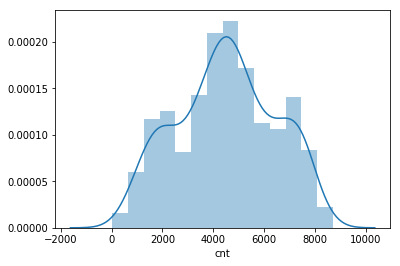

In [14]:
#plotting target variable
sns.distplot(df_day['cnt']);

In [15]:
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


#### 2. Independent Variables Analysis

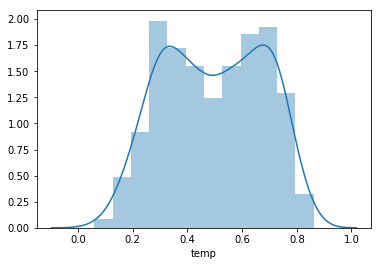

In [16]:
sns.distplot(df_day['temp']);

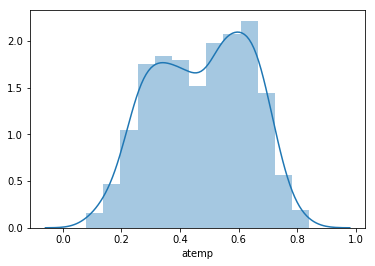

In [17]:
sns.distplot(df_day['atemp']);

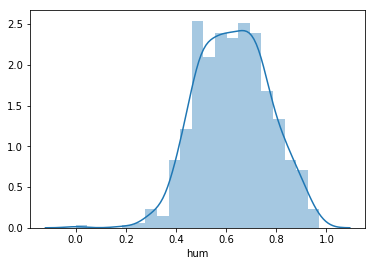

In [18]:
sns.distplot(df_day['hum']);

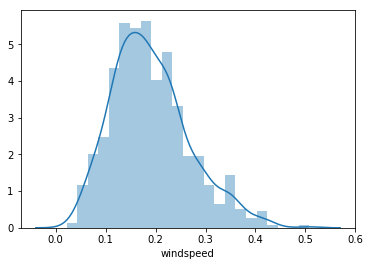

In [19]:
sns.distplot(df_day['windspeed']);

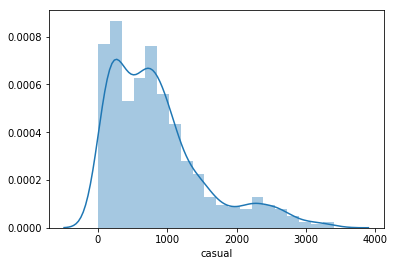

In [20]:
sns.distplot(df_day['casual']);

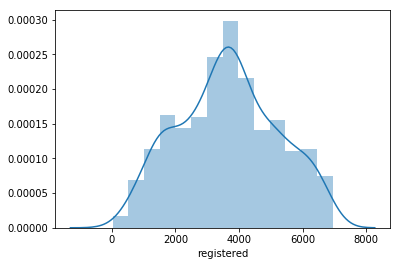

In [21]:
sns.distplot(df_day['registered']);

## Bivariate Analysis

#### Relation between Numerical Variable 'temp' and target variable 'cnt'

In [22]:
df_day['temp'].value_counts()

0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
0.484167    4
0.680000    4
0.696667    4
0.710833    4
0.514167    3
0.282500    3
0.667500    3
0.459167    3
0.554167    3
0.733333    3
0.636667    3
0.606667    3
0.342500    3
0.731667    3
0.653333    3
0.393333    3
0.530000    3
0.343333    3
0.414167    3
0.353333    3
0.577500    3
0.775000    3
0.715833    3
0.274167    3
0.550000    3
           ..
0.834167    1
0.381667    1
0.346667    1
0.765833    1
0.640833    1
0.415833    1
0.545000    1
0.359167    1
0.365833    1
0.623333    1
0.160870    1
0.365217    1
0.712500    1
0.348696    1
0.096522    1
0.538333    1
0.361667    1
0.715000    1
0.711667    1
0.343478    1
0.335833    1
0.570000    1
0.282609    1
0.396667    1
0.404167    1
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: temp, Length: 499, dtype: int64

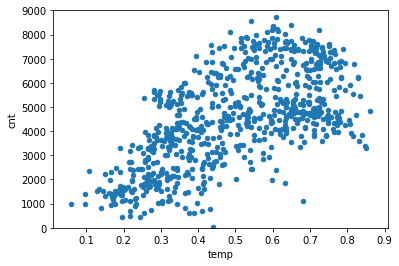

In [23]:
#Now drawing scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is good positive relation between 'temp' and 'cnt'

#### Relation between Numerical Variable 'atemp' and target variable 'cnt'

In [24]:
df_day['atemp'].value_counts()

0.654688    4
0.637008    3
0.375621    3
0.542929    2
0.603554    2
0.537896    2
0.243058    2
0.351629    2
0.594704    2
0.450121    2
0.387608    2
0.242400    2
0.298422    2
0.724121    2
0.611121    2
0.595346    2
0.378779    2
0.594083    2
0.398350    2
0.425492    2
0.574500    2
0.607962    2
0.522721    2
0.318812    2
0.654042    2
0.466525    2
0.325750    2
0.703292    2
0.607975    2
0.654054    2
           ..
0.326379    1
0.565217    1
0.228587    1
0.497463    1
0.338383    1
0.255679    1
0.542925    1
0.513242    1
0.533450    1
0.565067    1
0.445062    1
0.647100    1
0.513848    1
0.355425    1
0.645846    1
0.412237    1
0.116175    1
0.274621    1
0.707071    1
0.188413    1
0.323867    1
0.456429    1
0.150888    1
0.761367    1
0.461483    1
0.612379    1
0.464021    1
0.624371    1
0.512621    1
0.538521    1
Name: atemp, Length: 690, dtype: int64

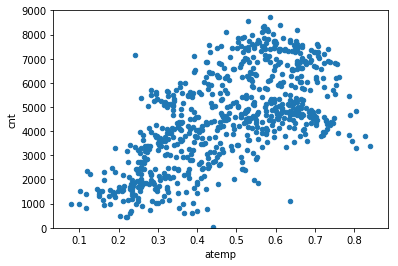

In [25]:
#Now drawing scatter plot between 'atemp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is good positive relation between 'atemp' and 'cnt'

#### Relation between Numerical Variable 'hum' and target variable 'cnt'

In [26]:
df_day['hum'].value_counts()

0.613333    4
0.568333    3
0.542500    3
0.752917    3
0.697083    3
0.630833    3
0.605000    3
0.590000    3
0.690000    3
0.729583    3
0.741250    3
0.552083    3
0.590417    3
0.483333    3
0.722917    3
0.538333    3
0.570000    3
0.862500    2
0.757500    2
0.434167    2
0.441250    2
0.672917    2
0.537917    2
0.410000    2
0.677500    2
0.805833    2
0.734583    2
0.668750    2
0.540833    2
0.694167    2
           ..
0.642500    1
0.422500    1
0.494167    1
0.616957    1
0.700833    1
0.640417    1
0.187917    1
0.414583    1
0.559167    1
0.691250    1
0.581667    1
0.561667    1
0.720417    1
0.896667    1
0.838750    1
0.797083    1
0.426250    1
0.457500    1
0.618333    1
0.609167    1
0.812917    1
0.810833    1
0.537500    1
0.712500    1
0.704167    1
0.615000    1
0.686667    1
0.480833    1
0.649565    1
0.741739    1
Name: hum, Length: 595, dtype: int64

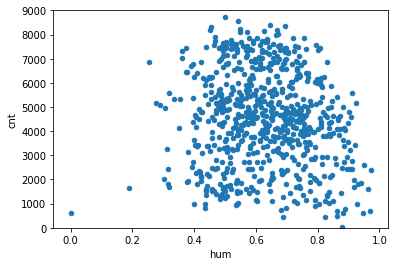

In [27]:
#Now drawing scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is poor relation between 'hum' and 'cnt'

#### Relation between Numerical Variable 'windspeed' and target variable 'cnt'

In [28]:
df_day['windspeed'].value_counts()

0.228858    3
0.118792    3
0.134954    3
0.149883    3
0.166667    3
0.110700    3
0.136817    3
0.167912    3
0.106350    3
0.116908    2
0.342667    2
0.157350    2
0.144904    2
0.121896    2
0.146775    2
0.102000    2
0.130600    2
0.296037    2
0.215792    2
0.361950    2
0.131221    2
0.122512    2
0.266175    2
0.140550    2
0.118167    2
0.063450    2
0.133721    2
0.168726    2
0.230725    2
0.236937    2
           ..
0.293961    1
0.117562    1
0.139308    1
0.077125    1
0.064071    1
0.147392    1
0.132467    1
0.162938    1
0.207721    1
0.271158    1
0.115522    1
0.225754    1
0.200875    1
0.237567    1
0.197763    1
0.213009    1
0.169779    1
0.136926    1
0.215804    1
0.103863    1
0.284829    1
0.193417    1
0.292287    1
0.093921    1
0.125621    1
0.388067    1
0.185333    1
0.189667    1
0.290421    1
0.415429    1
Name: windspeed, Length: 650, dtype: int64

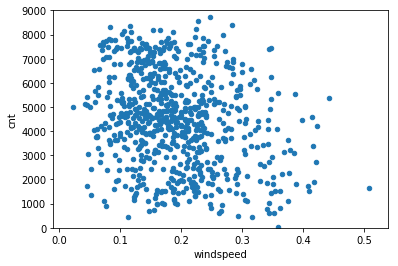

In [29]:
#Now drawing scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is negative relation between 'windspeed' and 'cnt'

#### Relation between Numerical Variable 'casual' and target variable 'cnt'

In [30]:
df_day['casual'].value_counts()

968     4
120     4
244     3
653     3
639     3
123     3
140     3
163     3
775     3
692     2
174     2
178     2
699     2
695     2
694     2
1026    2
190     2
1077    2
678     2
676     2
195     2
673     2
667     2
665     2
729     2
745     2
155     2
2795    2
349     2
819     2
       ..
559     1
560     1
562     1
563     1
2613    1
568     1
569     1
571     1
2622    1
579     1
2634    1
1612    1
845     1
1619    1
1278    1
1557    1
599     1
601     1
603     1
606     1
2708    1
1633    1
611     1
1088    1
613     1
614     1
1639    1
616     1
620     1
1118    1
Name: casual, Length: 606, dtype: int64

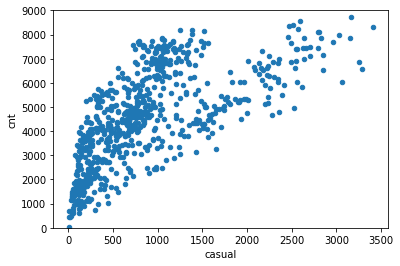

In [31]:
#Now drawing scatter plot between 'casual' and 'cnt' variables

var = 'casual'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is somewhat good positive relation between 'casual' and 'cnt'

#### Relation between Numerical Variable 'registered' and target variable 'cnt'

In [32]:
df_day['registered'].value_counts()

4841    3
1707    3
6248    3
3578    2
4429    2
1730    2
3848    2
2115    2
3840    2
674     2
1368    2
1454    2
3854    2
2713    2
4446    2
5711    2
3425    2
3614    2
4934    2
3594    2
3896    2
1628    2
4224    2
3248    2
4232    2
3946    2
2419    2
5219    2
4240    2
5265    2
       ..
2697    1
1672    1
6790    1
3717    1
4739    1
3714    1
2688    1
3185    1
1432    1
6803    1
5780    1
1687    1
6911    1
4790    1
1714    1
4750    1
2733    1
1708    1
1705    1
6433    1
5124    1
1689    1
1700    1
1699    1
1697    1
2720    1
670     1
1693    1
4763    1
4097    1
Name: registered, Length: 679, dtype: int64

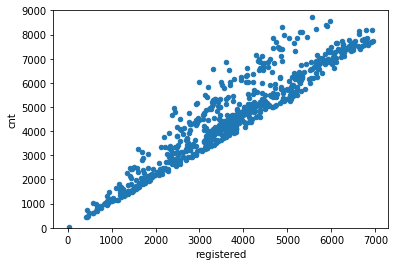

In [33]:
#Now drawing scatter plot between 'registered' and 'cnt' variables

var = 'registered'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing there is good relation between 'registered' and 'cnt'

#### Relation between Categorical Variable 'weekdays' and target variable 'cnt'

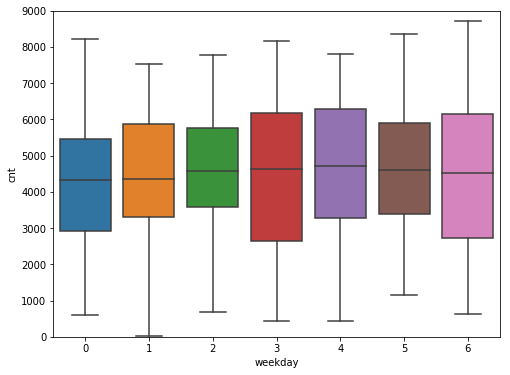

In [34]:
#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It is showing that for all the weekdays median in between 4000- 5000  

#### Relation between Categorical Variable 'holiday' and target variable 'cnt'

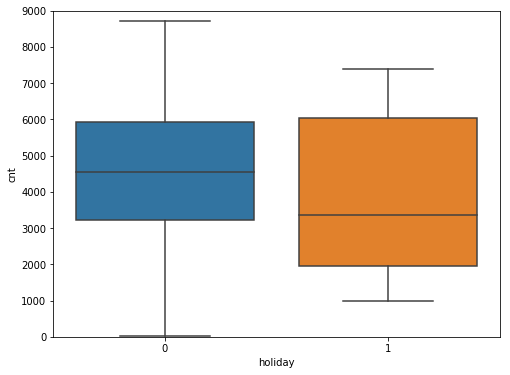

In [35]:
#box plot 'holiday' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It is showing that median  high on  0 compared to 1

#### Relation between Categorical Variable 'yr' and target variable 'cnt'

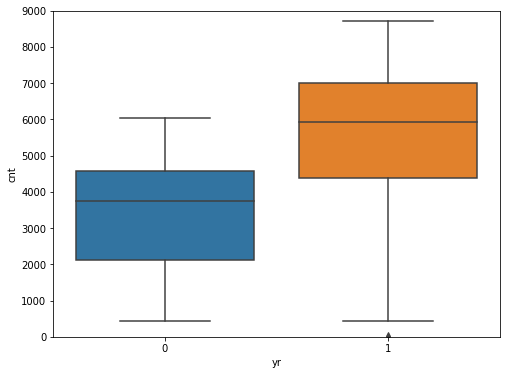

In [36]:
#box plot 'holiday' with 'CNT'
var_yr = 'yr'
data = pd.concat([df_day['cnt'], df_day[var_yr]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_yr, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that median is higher on 2012 than 2011

#### Relation between Categorical Variable 'mnth' and target variable 'cnt'

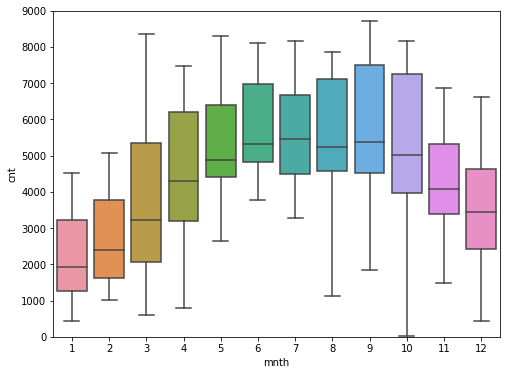

In [37]:
#box plot 'mnth' with 'CNT'
var_mnth = 'mnth'
data = pd.concat([df_day['cnt'], df_day[var_mnth]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_mnth, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing there's high variability in medians from different months, with July & september having highest median

#### Relation between Categorical Variable 'season' and target variable 'cnt'

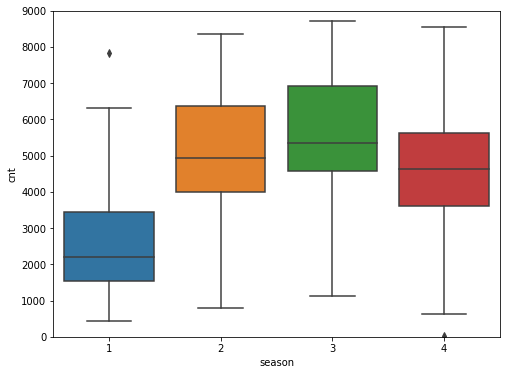

In [38]:
#box plot 'season' with 'CNT'
var_season = 'season'
data = pd.concat([df_day['cnt'], df_day[var_season]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_season, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that median is higher for season 2 & season 3 compared to other seasons

#### Relation between Categorical Variable 'workingday' and target variable 'cnt'

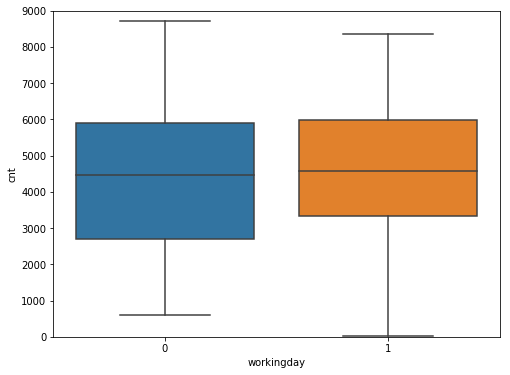

In [39]:
#box plot 'workingday' with 'CNT'
var_wd = 'workingday'
data = pd.concat([df_day['cnt'], df_day[var_wd]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_wd, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing the median is approximately same whether the day is working day or not

#### Relation between Categorical Variable 'weathersit' and target variable 'cnt'

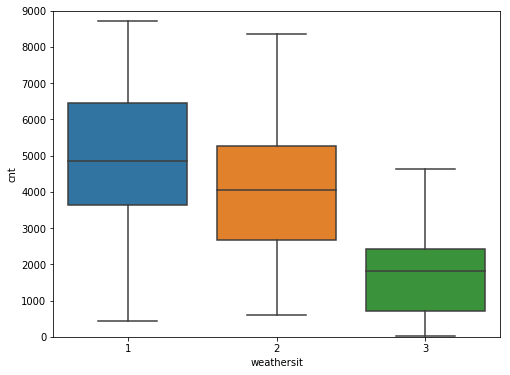

In [40]:
#box plot 'weathersit' with 'CNT'
var_ws = 'weathersit'
data = pd.concat([df_day['cnt'], df_day[var_ws]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_ws, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that the median follows this pattern in the weathersit variable : 1>2>3

# Missing Value Analysis

In [41]:
#Calculate missing value
missing_val = pd.DataFrame(df_day.isnull().sum())

In [42]:
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


So, I can see there are no missing values

# Outlier Analysis

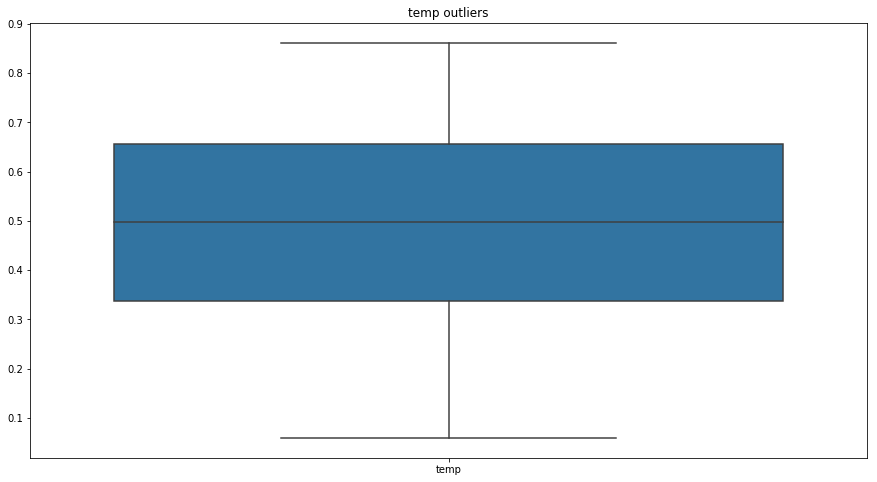

In [43]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for temp outliers
sns.boxplot(data=df_day[['temp']])
ax.set_title('temp outliers')
plt.show()

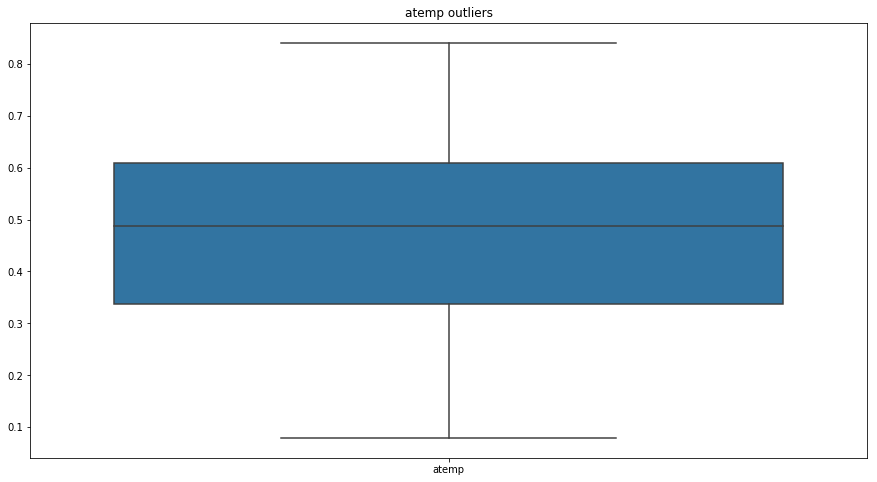

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for atemp outliers
sns.boxplot(data=df_day[['atemp']])
ax.set_title('atemp outliers')
plt.show()

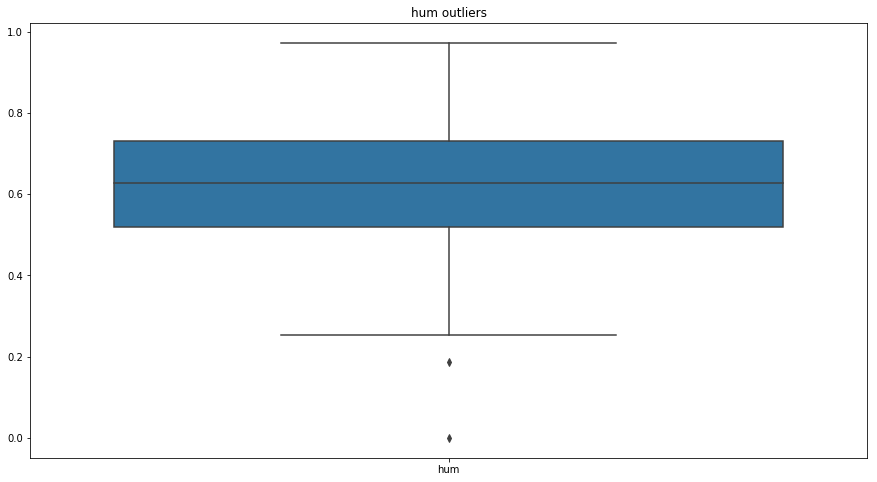

In [45]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for hum outliers
sns.boxplot(data=df_day[['hum']])
ax.set_title('hum outliers')
plt.show()

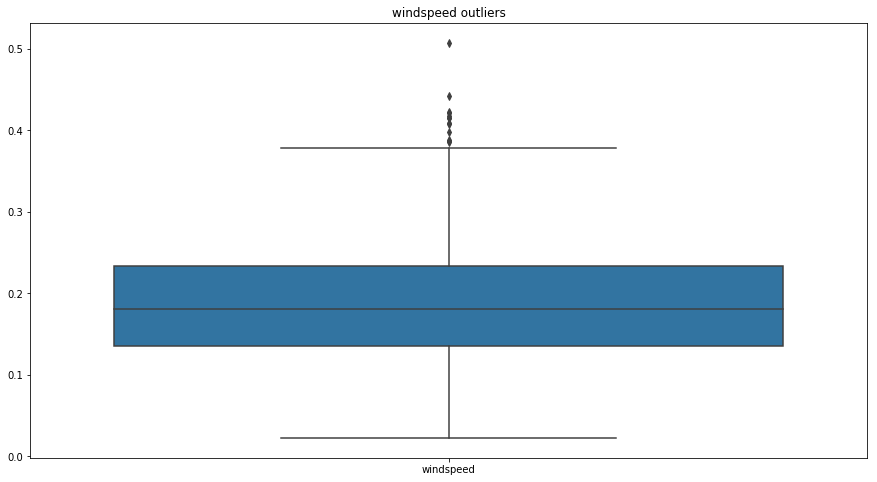

In [46]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for windspeed outliers
sns.boxplot(data=df_day[['windspeed']])
ax.set_title('windspeed outliers')
plt.show()

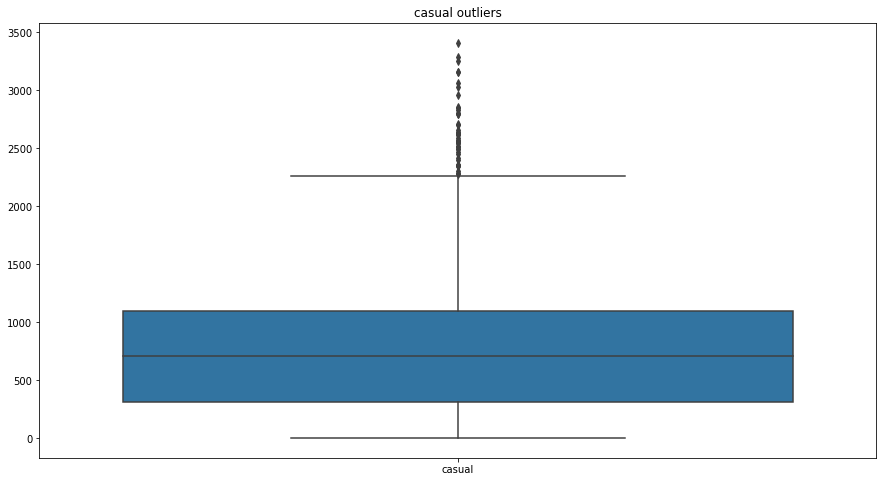

In [47]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for casual outliers
sns.boxplot(data=df_day[['casual']])
ax.set_title('casual outliers')
plt.show()

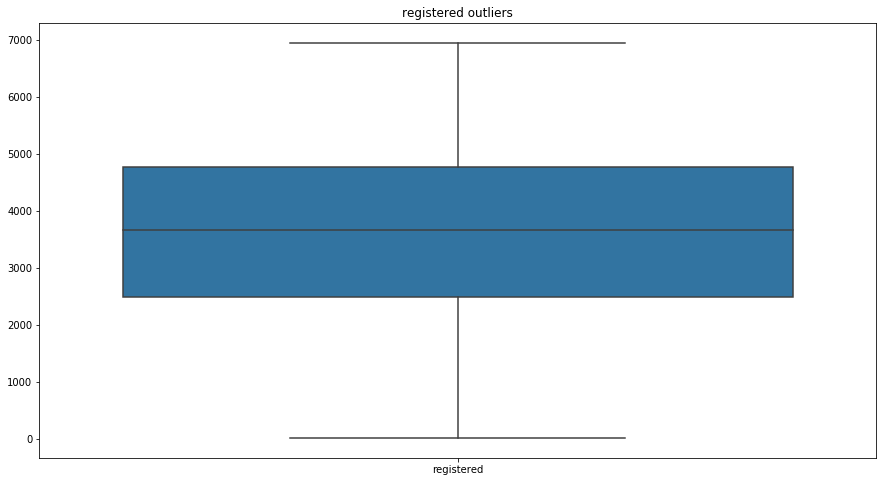

In [48]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for registered outliers
sns.boxplot(data=df_day[['registered']])
ax.set_title('registered outliers')
plt.show()

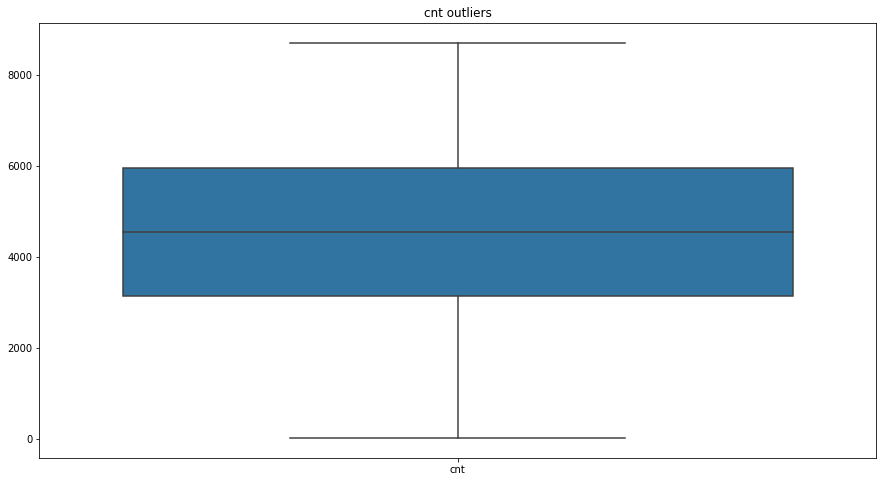

In [49]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for cnt outliers
sns.boxplot(data=df_day[['cnt']])
ax.set_title('cnt outliers')
plt.show()

#### I Can see 'hum', 'windspeed', 'casual' variables contain outliers

In [50]:
#create dataframe for hum
df_1=pd.DataFrame(df_day,columns=['hum'])
c1 = ['hum']

In [51]:
for i in c1:
    print(i)
    q75,q25=np.percentile(df_1.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL1=q25-(iqr*1.5) #inner fence
    UL1=q75+(iqr*1.5) #outer fence
    
    print(LL1)
    print(UL1)

hum
0.20468725
1.0455212500000002


In [52]:
df_1.loc[df_1['hum']<LL1,:i]=np.nan  #Replace with NA
df_1.loc[df_1['hum']>UL1,:i]=np.nan  #Replace with NA

In [53]:
#Calculate missing value
missing_val_1 = pd.DataFrame(df_1.isnull().sum())

In [54]:
missing_val_1

,0
hum,2


In [55]:
#create dataframe for windspeed
df_2=pd.DataFrame(df_day,columns=['windspeed'])
c2 = ['windspeed']

In [56]:
for i in c2:
    print(i)
    q75,q25=np.percentile(df_2.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL2=q25-(iqr*1.5) #inner fence
    UL2=q75+(iqr*1.5) #outer fence
    
    print(LL2)
    print(UL2)

windspeed
-0.012446750000000034
0.38061125


In [57]:
df_2.loc[df_2['windspeed']<LL2,:i]=np.nan  #Replace with NA
df_2.loc[df_2['windspeed']>UL2,:i]=np.nan  #Replace with NA

In [58]:
#Calculate missing value
missing_val_2 = pd.DataFrame(df_2.isnull().sum())

In [59]:
missing_val_2

,0
windspeed,13


In [60]:
#create dataframe for casual
df_3 = pd.DataFrame(df_day,columns=['casual'])
c3 = ['casual']

In [61]:
for i in c3:
    print(i)
    q75,q25=np.percentile(df_3.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL3=q25-(iqr*1.5) #inner fence
    UL3=q75+(iqr*1.5) #outer fence
    
    print(LL3)
    print(UL3)

casual
-855.25
2266.75


In [62]:
df_3.loc[df_3['casual']<LL3,:i]=np.nan  #Replace with NA
df_3.loc[df_3['casual']>UL3,:i]=np.nan  #Replace with NA

In [63]:
#Calculate missing value
missing_val_3 = pd.DataFrame(df_3.isnull().sum())

In [64]:
missing_val_3

,0
casual,44


In [65]:
missing_val_ol = missing_val_1.append(missing_val_2).append(missing_val_3)

In [66]:
missing_val_ol

,0
hum,2
windspeed,13
casual,44


In [67]:
#df_1['hum'].loc[4]

0.436957

In [70]:
#create missing value
#df_1['hum'].loc[4] = np.nan

#### actual value = 0.436957
#### mean = 0.6291968177842561
#### median = 0.6270834999999999
#### knn = 0.7075414618709852
#### So, median is giving the best result here

In [681]:
#mean method
#df_1['hum'] = df_1['hum'].fillna(df_1['hum'].mean())

In [741]:
#median method
#df_1['hum'] = df_1['hum'].fillna(df_1['hum'].median())

In [800]:
#KNN imputation
#Assigning levels to the categories
#lis = []
#for i in range(0, df_1.shape[1]):
 #   print(i)
  #  if(df_1.iloc[:,i].dtypes == 'object'):
   #     df_1.iloc[:,i] = pd.Categorical(df_1.iloc[:,i])
    #    print(df_1[[i]])
     #   df_1.iloc[:,i] = df_1.iloc[:,i].cat.codes 
      #  df_1.iloc[:,i] = df_1.iloc[:,i].astype('object')
        
       # lis.append(df_1.columns[i])

0
1
2


In [801]:
#Apply KNN imputation algorithm
#df_1 = pd.DataFrame(KNN(k = 3).fit_transform(df_1), columns = df_1.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.095
Imputing row 101/731 with 0 missing, elapsed time: 0.095
Imputing row 201/731 with 0 missing, elapsed time: 0.096
Imputing row 301/731 with 0 missing, elapsed time: 0.096
Imputing row 401/731 with 0 missing, elapsed time: 0.096
Imputing row 501/731 with 0 missing, elapsed time: 0.097
Imputing row 601/731 with 0 missing, elapsed time: 0.098
Imputing row 701/731 with 0 missing, elapsed time: 0.098
[KNN] Warning: 132/2193 still missing after imputation, replacing with 0


In [67]:
#Imputating the outliers by median Imputation
df_1['hum']=df_1['hum'].fillna(df_1['hum'].median())
df_2['windspeed']=df_2['windspeed'].fillna(df_2['windspeed'].median())
df_3['casual']=df_3['casual'].fillna(df_3['casual'].median())

Now again checking for nan

In [68]:
df_1.isnull().sum()

hum    0
dtype: int64

In [69]:
df_2.isnull().sum()

windspeed    0
dtype: int64

In [70]:
df_3.isnull().sum()

casual    0
dtype: int64

In [71]:
#Replacing with the imputated hum
df_day['hum']=df_day['hum'].replace(df_1['hum'])
#Replacing with the imputated windspeed
df_day['windspeed']=df_day['windspeed'].replace(df_2['windspeed'])
#Replacing with the imputated casual
df_day['casual']=df_day['casual'].replace(df_3['casual'])

# Feature Selection

In [72]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,253.0,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,695.0,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1138.0,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,409.0,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,166.0,1518,1600


In [73]:
df_day.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.628996,0.190486,1042.699042,3656.172367,4504.348837
std,0.183051,0.162961,0.140670,0.077498,639.699394,1560.256377,1937.211452
min,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.521041,0.134950,674.000000,2497.000000,3152.000000
50%,0.498333,0.486733,0.627500,0.180975,907.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730833,0.233214,1325.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [74]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), float64(5), int64(2)
memory usage: 46.4 KB


## Correlation Analysis 

In [75]:
day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [76]:
day_numeric.shape

(731, 7)

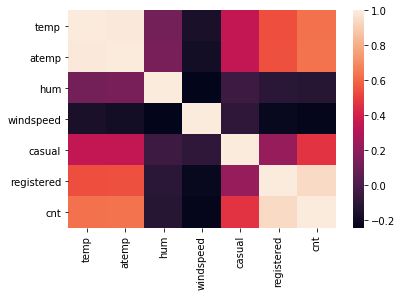

In [77]:
sns.heatmap(day_numeric.corr())

In [78]:
#Selection of numerical feature  based  on pearson correlation 

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.12,-0.16,0.35,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.35,0.54,0.63
hum,0.12,0.14,1.0,-0.24,-0.05,-0.11,-0.12
windspeed,-0.16,-0.18,-0.24,1.0,-0.093,-0.22,-0.23
casual,0.35,0.35,-0.05,-0.093,1.0,0.22,0.47
registered,0.54,0.54,-0.11,-0.22,0.22,1.0,0.95
cnt,0.63,0.63,-0.12,-0.23,0.47,0.95,1.0


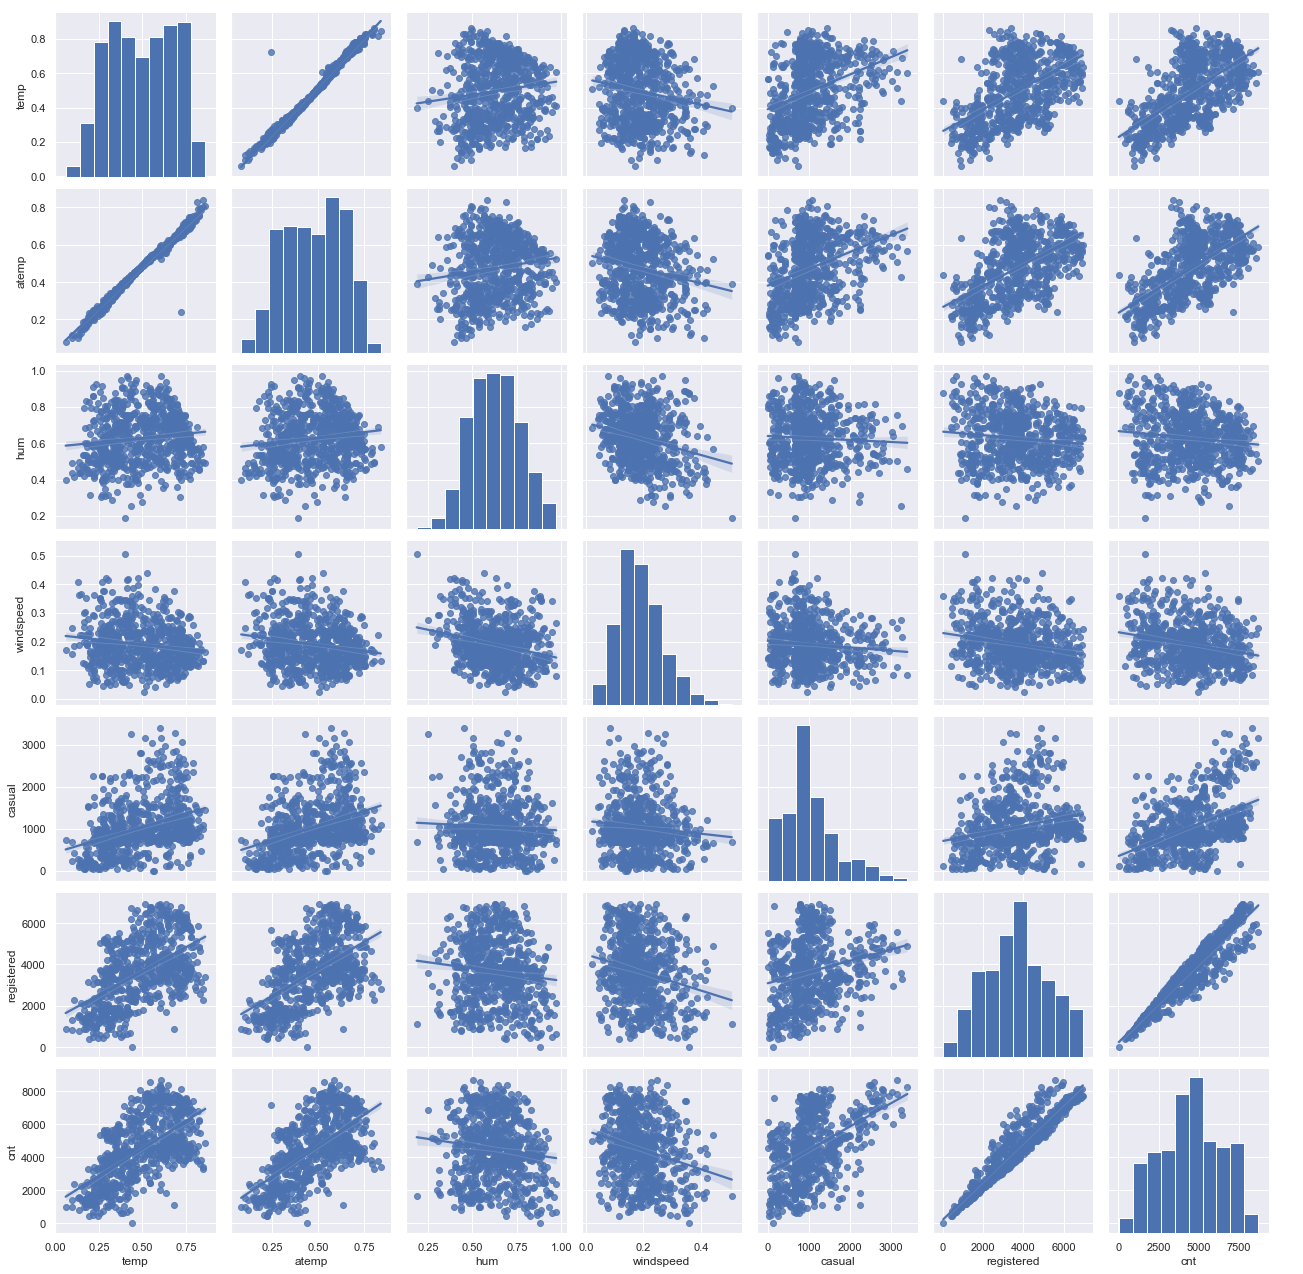

In [79]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered','cnt']
sns.pairplot(day_numeric[cols], height = 2.5,kind="reg")
plt.show();

I can see high positive correlation between Independent variable 'temp' and 'atemp' so, I'll drop atemp

## Analysis of Variance (ANOVA) Test

-  It is carried out to compare between each groups in a categorical variable.
-  ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.
-  Hypothesis testing :
    -  Null Hypothesis: mean of all categories in a variable are same.
    -  Alternate Hypothesis: mean of at least one category in a variable is different.
-  If p-value is less than 0.05 then we reject the null hypothesis.
-  And if p-value is greater than 0.05 then we accept the null hypothesis.

In [80]:
cat_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [81]:
def anova_test(df_day,target):
    for i in cat_var:
        formula=('{} ~ {}').format(target, i)
        df_day.lm = ols(formula,data=df_day).fit()
        table = sm.stats.anova_lm(df_day.lm, typ=1)
        print('Anova table between',target,'and',i,'is\n',table)

In [82]:
from statsmodels.formula.api import ols

In [83]:
print('\n For target var = cnt--')
anova_test(df_day,'cnt')


 For target var = cnt--
Anova table between cnt and season is
              df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN
Anova table between cnt and yr is
              df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN
Anova table between cnt and mnth is
              df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.070192e+09  9.729021e+07  41.903703  4.251077e-70
Residual  719.0  1.669343e+09  2.321757e+06        NaN           NaN
Anova table between cnt and holiday is
              df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN
Anova

After looking at above table we see that p-value is 
-  less than 0.05 for season
-  less than 0.05 for weathersit
-  less than 0.05 for yr
-  less than 0.05 for mnth
-  greater than 0.05 for weekday 
-  greater than 0.05 for holiday
-  greater than 0.05 for workingday

so, I can accept the null hypothesis for weekday, holiday & workingday, saying that the means of all categories in these variables are same.
&, I can't accept the null hypothesis for season, weathersit, yr & mnth, saying that the means of all categories in these variables are not same.

However, as ANOVA doesn't specify which categories means are different, we can't conclude from the test results about which categorical variables I should remove.

## Chi squared Test of independence

In [84]:
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_day[i], df_day[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

season and yr are independent on each other with 0.9999288084245916 ----Keep
season and mnth are dependent on each other with 0.0 ----Remove
season and holiday are independent on each other with 0.6831687073042003 ----Keep
season and weekday are independent on each other with 0.9999999999988407 ----Keep
season and workingday are independent on each other with 0.8865568364019545 ----Keep
season and weathersit are dependent on each other with 0.021179301044733697 ----Remove
yr and season are independent on each other with 0.9999288084245916 ----Keep
yr and mnth are independent on each other with 0.9999999999999892 ----Keep
yr and holiday are independent on each other with 0.9949247279855291 ----Keep
yr and weekday are independent on each other with 0.9999995848511959 ----Keep
yr and workingday are independent on each other with 0.9799434134248637 ----Keep
yr and weathersit are independent on each other with 0.12737941480418666 ----Keep
mnth and season are dependent on each other with 0.0

variables which are highly dependent on each other based on p-values are:
    - season and month-0
    - season and weathersit-0.0211
    - mnth and weathersit-0.014
    - holiday and weekday-8.56e-11
    - hoilday and workingday-4.033e-11
    - weekday and workingday-6.77e-136
So I will remove season,holiday.

In [85]:
df_day = df_day.drop(['atemp','season','holiday'],axis = 1)

In [86]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
yr            731 non-null category
mnth          731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(5), float64(4), int64(2)
memory usage: 39.0 KB


In [87]:
df_day.shape

(731, 11)

I'll develop models based on decision tree, random forest & linear regression. As feature scaling does not have any impact on these algorithms, I'm choosing not to do feature scaling.

# Model Development

## Decision Tree Regressor

MAPE = 5.725581445090314%

In [88]:
#dividing  test and train data  using skilearn   train_test_split 
train, test = train_test_split(df_day, test_size=0.2)

In [89]:
train.shape

(584, 11)

In [90]:
train.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
189,0,7,6,0,1,0.733333,0.609167,0.167912,1988.0,3348,5336
567,1,7,6,0,3,0.595833,0.865417,0.213300,1264.0,3195,4459
325,0,11,2,1,3,0.416667,0.962500,0.118792,247.0,1538,1607
585,1,8,3,1,2,0.750000,0.672917,0.110700,1263.0,6271,7534
618,1,9,1,1,1,0.583333,0.503750,0.258713,1118.0,6407,7525


In [91]:
test.shape

(147, 11)

In [92]:
test.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
446,1,3,4,1,1,0.554167,0.831250,0.117562,1334.0,5537,6871
420,1,2,6,0,1,0.290833,0.395833,0.421642,595.0,2415,2732
368,1,1,3,1,2,0.107500,0.414583,0.184700,413.0,2273,2368
434,1,3,6,0,1,0.287500,0.350417,0.225750,968.0,3150,4118
181,0,7,5,1,1,0.722500,0.396250,0.102608,1246.0,4116,5362


In [93]:
train_features_one = train[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_features_one = test[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values

In [94]:
train_features_one

array([[0, 7, 6, ..., 0.16791199999999998, 1988.0, 3348],
       [1, 7, 6, ..., 0.2133, 1264.0, 3195],
       [0, 11, 2, ..., 0.11879200000000001, 247.0, 1538],
       ...,
       [0, 4, 2, ..., 0.3265, 709.0, 3722],
       [0, 12, 0, ..., 0.0665417, 174.0, 2366],
       [1, 5, 3, ..., 0.216412, 1050.0, 4097]], dtype=object)

In [95]:
# Implement  decision tree algorithm
fit_dt = DecisionTreeRegressor(max_depth=2).fit(train_features_one, train_target_feature)
print(fit_dt)

DecisionTreeRegressor(max_depth=2)


In [96]:
#Apply model on test data
predictions_DT = fit_dt.predict(test_features_one)

print(predictions_DT)

[7231.97916667 4089.34666667 1792.5203252  4089.34666667 5622.66428571
 4089.34666667 4089.34666667 1792.5203252  1792.5203252  1792.5203252
 4089.34666667 5622.66428571 1792.5203252  1792.5203252  1792.5203252
 7231.97916667 7231.97916667 1792.5203252  7231.97916667 5622.66428571
 4089.34666667 4089.34666667 4089.34666667 1792.5203252  4089.34666667
 5622.66428571 1792.5203252  5622.66428571 7231.97916667 5622.66428571
 5622.66428571 5622.66428571 7231.97916667 4089.34666667 4089.34666667
 4089.34666667 7231.97916667 5622.66428571 7231.97916667 4089.34666667
 4089.34666667 4089.34666667 1792.5203252  5622.66428571 1792.5203252
 4089.34666667 4089.34666667 5622.66428571 5622.66428571 7231.97916667
 4089.34666667 5622.66428571 4089.34666667 1792.5203252  5622.66428571
 7231.97916667 7231.97916667 5622.66428571 5622.66428571 1792.5203252
 1792.5203252  5622.66428571 5622.66428571 1792.5203252  4089.34666667
 1792.5203252  5622.66428571 5622.66428571 1792.5203252  1792.5203252
 4089.34666

In [97]:
#Calculate MAPE
def MAE(y_true, y_pred): 
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

MAE(test_target_feature, predictions_DT)

549.2014964998775

In [98]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

17.03381757772561

In [99]:
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    rmse=np.sqrt(mse)
    return rmse
RMSE(test_target_feature, predictions_DT)

736.8110420750387

In [100]:
#Controlling the overfitting by setting "max_depth" to 14 and "min_samples_split" to 7
max_depth = 14
min_samples_split =7
fit_dt_2 = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
fit_dt_2 = fit_dt_2.fit(train_features_one, train_target_feature)
print(fit_dt_2)

predictions_DT_two = fit_dt_2.predict(test_features_one)

print(predictions_DT_two)

DecisionTreeRegressor(max_depth=14, min_samples_split=7, random_state=1)
[6753.         3022.         2408.6        4220.5        4934.25
 4561.83333333 3586.66666667 1952.         2051.75       1429.75
 3783.25       5534.75       2295.5        1945.66666667 2295.5
 7496.6        7559.16666667 2051.75       6298.16666667 5691.66666667
 3815.33333333 5674.         4749.2        1032.         4003.33333333
 6965.75       2051.75       5691.66666667 6502.         7468.6
 6625.         5331.         8221.4        3946.4        4220.
 4453.33333333 7602.         5259.16666667 6881.8        4561.83333333
 4220.5        2878.          788.         7468.6         683.
 3406.75       4453.33333333 6413.5        5651.4        7343.
 4749.2        6252.75       5017.33333333 1604.5        5651.4
 6980.66666667 6502.         4959.66666667 6625.         1032.
 1531.33333333 5259.16666667 4740.         2181.33333333 3594.16666667
 2051.75       4781.         4687.8        1615.2         944.
 2667.

In [101]:
MAE(test_target_feature,predictions_DT_two)

206.4498866213152

In [102]:
MAPE(test_target_feature,predictions_DT_two)

5.725581445090314

In [103]:
RMSE(test_target_feature,predictions_DT_two)

344.3223945256568

In [104]:
#setting "max_depth" to 16 and "min_samples_split" to 8 
max_depth = 16
min_samples_split =8
fit_dt_3 = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
fit_dt_3 = fit_dt_3.fit(train_features_one, train_target_feature)
print(fit_dt_3)

predictions_DT_three = fit_dt_3.predict(test_features_one)

print(predictions_DT_three)

DecisionTreeRegressor(max_depth=16, min_samples_split=8, random_state=1)
[6203.         3022.         2408.6        4220.5        4934.25
 4561.83333333 3586.66666667 1877.57142857 2051.75       1429.75
 3759.85714286 5534.75       2295.5        1945.66666667 2295.5
 7496.6        7559.16666667 2051.75       6298.16666667 5812.71428571
 3815.33333333 5674.         4749.2        1032.         4003.33333333
 6965.75       2051.75       5812.71428571 6573.71428571 7468.6
 6625.         5331.         8221.4        3982.42857143 4292.14285714
 4453.33333333 7602.         5259.16666667 6881.8        4486.
 4220.5        2878.          899.42857143 7468.6         683.
 3406.75       4453.33333333 6413.5        5651.4        7343.
 4749.2        6252.75       5017.33333333 1604.5        5651.4
 7022.42857143 6573.71428571 5068.42857143 6625.         1032.
 1531.33333333 5259.16666667 4790.85714286 2181.33333333 3616.
 2051.75       4781.         4712.71428571 1579.71428571  899.42857143
 2667.

In [105]:
MAE(test_target_feature,predictions_DT_three)

211.36469063816003

In [106]:
MAPE(test_target_feature,predictions_DT_three)

5.896082901559185

In [107]:
RMSE(test_target_feature,predictions_DT_three)

350.95749871340985

As the error rate is increasing, I'll use max_depth = 14 & min_samples_split =7

## Random Forest

MAPE = 4.0145657045380245 %

In [108]:
RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)

In [109]:
RF_predict_one= RF_model_one.predict(test_features_one)

In [110]:
#Evaluate Random forest using  MAE 

MAE(test_target_feature,RF_predict_one)

133.55099319727896

In [111]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

4.0145657045380245

In [112]:
#Evaluate Random forest using  RMSE 

RMSE(test_target_feature,RF_predict_one)

187.8525706744702

In [113]:
mir_result = fs.mutual_info_regression(train_features_one, train_target_feature) # mutual information regression for feature ordering
mir_result

array([0.26162294, 0.42162136, 0.02874429, 0.01767334, 0.05699507,
       0.39342925, 0.05879827, 0.06231968, 0.29024724, 1.62390933])

In [114]:
#tuning  Random FOrest Model

importances = list(RF_model_one.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[0.0005456200045277351, 0.0021392087492725516, 0.001704082442401458, 0.016242895005204636, 0.00032066078228673236, 0.012866764588373946, 0.0017404833623597782, 0.001426796379754078, 0.05175896332992424, 0.9112545253558948]


In [115]:
train_variables_one_1= train[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

yr = 0.26162293558077465
mnth = 0.42162135619897434
weekday = 0.0287442934613078
workingday = 0.017673343716069656
weathersit = 0.056995071972566036
temp = 0.3934292547513758
hum = 0.0587982703601182
windspeed = 0.06231967799485005
casual = 0.2902472418082893
registered = 1.623909331037599


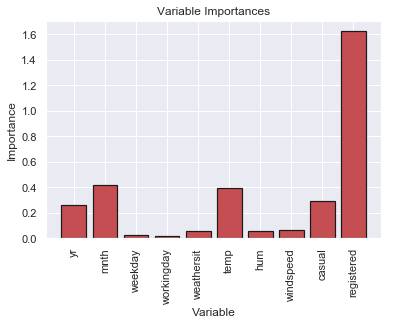

In [116]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one_1, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [117]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now I wil check our model accuracy  by removing the least important feature, workingday
train_feature_two = train[["yr" ,"mnth","weekday","weathersit","temp","hum","windspeed","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","weathersit","temp","hum","windspeed","casual","registered"]].values

# build random forest model
Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)

# Predict the model using predict funtion
RF_predict_two= Rf_model_two.predict(test_feature_two)

print(RF_predict_two)


[6496.858 3111.282 2518.008 3713.29  5094.628 4582.278 3621.238 1958.816
 2153.08  1296.976 3849.962 5631.978 2342.54  1654.39  2070.826 7456.396
 7681.958 2214.276 6838.014 5724.552 3881.35  5584.224 4116.568 1075.792
 4231.458 6852.014 2149.692 5966.546 6496.812 7439.206 6725.81  5596.796
 7622.836 4001.832 4358.078 4360.844 7607.046 5199.49  6820.76  4774.348
 3902.308 3115.896  772.194 7421.524  609.718 3387.956 4332.178 6189.98
 5266.816 7366.476 5920.944 5911.2   4589.256 2018.244 5860.162 7037.866
 6574.696 4969.216 6227.38  1110.132 1575.622 5434.982 4788.872 2283.55
 3686.994 2007.18  4839.76  4668.706 1581.996 1090.784 2964.91  7629.006
 5802.574 3821.438 2425.78  3936.312 6497.32  1360.272 6961.726 2234.914
 3106.656 3978.698 1578.446 7492.272 3199.138 1833.498 5043.914 4192.818
 4943.968 1514.804 4574.732 4785.842 5020.246 5992.926 5552.954 5232.832
 2309.14  7058.068 4928.044 7293.222 4321.208 5211.494 7393.074 4212.174
 2450.444 3818.826 4170.456 3636.5   3789.086 6924.41

In [118]:
#Evaluate Random forest using  MAE 

MAE(test_target_feature,RF_predict_two)

156.0843537414966

In [119]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

4.658882779427421

In [120]:
#Evaluate Random forest using  RMSE 

RMSE(test_target_feature,RF_predict_two)

213.19551173856684

So, we can see the error rate has increased. So, I'm not reducing the no. of variables (RF_model_one is the final Random forest model)

## Linear Regression

MAPE = 18.17626269527007%

As I have categorical variables in both the train & test dataset with more than 2 categories, I'll have to convert themm to numeric type

In [121]:
df_day.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0,1,6,0,2,0.344167,0.805833,0.160446,253.0,654,985
1,0,1,0,0,2,0.363478,0.696087,0.248539,695.0,670,801
2,0,1,1,1,1,0.196364,0.437273,0.248309,1138.0,1229,1349
3,0,1,2,1,1,0.200000,0.590435,0.160296,409.0,1454,1562
4,0,1,3,1,1,0.226957,0.436957,0.186900,166.0,1518,1600


In [122]:
cat_var1 = ['yr','mnth','weekday','workingday','weathersit']

In [123]:
#Creating dummies for categorical variables
for i in cat_var1:
    ''' Creating dummies for each variable in cat_var and merging dummies dataframe to our original dataframe '''
    temp = pd.get_dummies(df_day[i], prefix = i)
    df_day = df_day.join(temp)

In [124]:
df_day.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0,1,6,0,2,0.344167,0.805833,0.160446,253.0,654,...,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,2,0.363478,0.696087,0.248539,695.0,670,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,1,1,0.196364,0.437273,0.248309,1138.0,1229,...,0,0,0,0,0,0,1,1,0,0
3,0,1,2,1,1,0.200000,0.590435,0.160296,409.0,1454,...,1,0,0,0,0,0,1,1,0,0
4,0,1,3,1,1,0.226957,0.436957,0.186900,166.0,1518,...,0,1,0,0,0,0,1,1,0,0


In [125]:
df_day.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'yr_0', 'yr_1', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [126]:
df_day = df_day.drop(['yr','mnth','weekday','workingday','weathersit'],axis = 1)

In [127]:
df_day.shape

(731, 32)

In [128]:
train_lr, test_lr = train_test_split(df_day, test_size=0.2)

In [129]:
train_lr.shape

(584, 32)

In [130]:
train_lr.head()

,temp,hum,windspeed,casual,registered,cnt,yr_0,yr_1,mnth_1,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
623,0.608333,0.501667,0.247521,3160.0,5554,8714,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
485,0.464167,0.570000,0.171638,674.0,4907,5572,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
527,0.720833,0.587917,0.207713,1017.0,5647,6664,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
417,0.395833,0.567917,0.234471,126.0,4379,4773,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
200,0.768333,0.707083,0.113817,674.0,3688,4332,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [131]:
test_lr.shape

(147, 32)

In [132]:
test_lr.head()

,temp,hum,windspeed,casual,registered,cnt,yr_0,yr_1,mnth_1,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
75,0.415000,0.602917,0.209579,65.0,2320,2744,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
78,0.332500,0.473750,0.207721,1047.0,1424,2471,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
407,0.127500,0.464583,0.409212,289.0,1456,1529,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
715,0.362500,0.838750,0.100742,964.0,3248,3786,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
369,0.265833,0.524167,0.129987,2258.0,3132,3272,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0


In [133]:
train_features_lr = train_lr[['temp', 'hum', 'windspeed', 'casual', 'registered', 
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1']].values
train_target_feature_lr = train_lr['cnt'].values
test_features_lr = test_lr[['temp', 'hum', 'windspeed', 'casual', 'registered', 
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1']].values
test_target_feature_lr= test_lr['cnt'].values

In [134]:
train_features_lr

array([[0.608333, 0.501667, 0.247521, ..., 1.      , 1.      , 0.      ],
       [0.464167, 0.57    , 0.171638, ..., 0.      , 0.      , 1.      ],
       [0.720833, 0.587917, 0.207713, ..., 0.      , 0.      , 1.      ],
       ...,
       [0.631667, 0.729167, 0.3265  , ..., 0.      , 0.      , 1.      ],
       [0.665833, 0.712083, 0.208954, ..., 0.      , 0.      , 1.      ],
       [0.703333, 0.730417, 0.128733, ..., 0.      , 0.      , 1.      ]])

In [135]:
#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature_lr, train_features_lr).fit()

In [136]:
#Summary of model
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1310.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:42:31   Log-Likelihood:                -4046.9
No. Observations:                 584   AIC:                             8148.
Df Residuals:                     557   BIC:                             8266.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           641.6888    162.582      3.947      0.000     322.340     961.038
x2          -178.5048    115.341     -1.548      0.122    -405.062      48.052
x3          -678.4978    156.367     -4.339      0.000    -985.639    -371.356
x4             0.4926      0.022     22.122      0.000       0.449       0.536
x5             1.0943      0.017     66.251      0.000       1.062       1.127
x6            46.5360     33.123      1.405      0.161     -18.526     111.598
x7           -13.1353     34.039     -0.386      0.700     -79.996      53.726
x8           -57.2460     63.320     -0.904      0.366    -181.621      67.129
x9           -22.9231     36.508     -0.628      0.530     -94.634      48.788
x10           -0.9221     45.500     -0.020      0.984     -90.295      88.450
x11         -165.4903     50.403     -3.283      0.001    -264.493     -66.487
x12         -194.3177     45.283     -4.291      0.000    -283.264    -105.372
x13           99.6507     37.299      2.672      0.008      26.388     172.914
x14          152.7030     37.239      4.101      0.000      79.557     225.849
x15          165.1892     40.072      4.122      0.000      86.479     243.899
x16           86.8293     47.068      1.845      0.066      -5.623     179.281
x17           19.6371     53.933      0.364      0.716     -86.301     125.575
x18           48.6826     50.486      0.964      0.335     -50.484     147.849
x19           34.7034     43.306      0.801      0.423     -50.360     119.767
x20           37.0545     38.351      0.966      0.334     -38.275     112.385
x21         -103.2170     42.237     -2.444      0.015    -186.181     -20.253
x22         -205.2702     41.507     -4.945      0.000    -286.800    -123.740
x23           56.7276     51.111      1.110      0.268     -43.666     157.121
x24          -44.7950     29.508     -1.518      0.130    -102.755      13.165
x25          -77.2748     34.813     -2.220      0.027    -145.655      -8.894
x26          -69.5425     36.391     -1.911      0.057    -141.023       1.938
x27          -85.3084     34.881     -2.446      0.015    -153.824     -16.793
x28           52.1416     34.747      1.501      0.134     -16.109     120.393
x29          144.2063     51.711      2.789      0.005      42.634     245.779
x30          206.6014     51.231      4.033      0.000     105.972     307.231
x31         -230.4466     50.360     -4.576      0.000    -329.366    -131.527
==============================================================================
Omnibus:                       40.373   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.954
Skew:                          -0.361   Prob(JB):                     8.85e-22
Kurtosis:                       4.861   Cond. No.                     1.06e+16
==

In [137]:
#predict the  model

predict_LR = linear_regression_model.predict(test_features_lr)

print(predict_LR)

[2394.86733342 2448.57081947 1571.58494141 4087.84129609 4093.01513158
 6702.632189   2888.82008356 4957.0874457  1597.47479458 4671.67654497
 4007.02855317 5033.85011394 6723.5447     5115.19327425 6897.88563565
 6812.35603434 4573.5218556  3192.44998444 6593.21789502 4079.99708823
 7458.48688534 4718.14483997 2950.16351497 5547.06712708 2399.53338938
 6755.90228934 7360.52455594 2551.10552546 5968.1350432  5539.50127705
 6283.49205176 4531.14235922 5183.82946473 7129.43865498 5541.31166023
 6365.62461218 4450.85965277 4756.91349703 -333.13154147 1304.23693449
 4821.69862024 6209.46283018 3290.95493432 1597.72483981 3860.66502815
  982.1333908  7139.44251643 3699.49566598  616.26945682 2688.5980111
 1753.96106691 3843.14392331 1040.51349203 1435.1265231  4410.40598582
 4172.49809284 2081.00433371 2343.23943832 7773.84157585 4596.48837383
 6625.06237926 2765.67897469 2383.88880679 6061.07811474 1365.27300036
 6105.54190506 2804.32280884 5078.95996942 3605.53074832 5337.88881557
 5272.5

In [138]:
#evaluate model using MAE

MAE(test_target_feature_lr,predict_LR)

203.02773706676462

In [139]:
#evaluate model using MAPE

MAPE(test_target_feature_lr,predict_LR)

18.17626269527007

In [140]:
#evaluate model using RMSE

RMSE(test_target_feature_lr,predict_LR)

270.9225450246571

Conclusion  Random Forest is the  best model for the dataset

# Output with New Input

MAPE = 7.13317658934405

I've selected a few observations from the given dataset & slightly altered them to create a new dataset in order to get features with realistic values; I shall use this dataset as a new sample input & predict the output & at last I'll see how well the model is performing (by checking the error rate)

#### Instructions for using this model on a dataset
1. Drop 'instant','dteday','season','holiday' & 'atemp' variables as these are statistically insignificant
2. Convert 'yr','mnth','weekday','workingday' & 'weathersit' variables to category type
3. Apply the model on the indepenent variables

In [141]:
df_eval = pd.read_csv('day_new.csv')

In [142]:
df_eval.shape

(4, 16)

In [143]:
df_eval

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,326,660,986
1,84,25-03-2011,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,292,1928,2220
2,249,06-09-2011,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,211,2499,2710
3,268,25-09-2011,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1522,3458,5010


In [144]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 16 columns):
instant       4 non-null int64
dteday        4 non-null object
season        4 non-null int64
yr            4 non-null int64
mnth          4 non-null int64
holiday       4 non-null int64
weekday       4 non-null int64
workingday    4 non-null int64
weathersit    4 non-null int64
temp          4 non-null float64
atemp         4 non-null float64
hum           4 non-null float64
windspeed     4 non-null float64
casual        4 non-null int64
registered    4 non-null int64
cnt           4 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 592.0+ bytes


In [145]:
#dropping statistically insignificant variables
df_eval=df_eval.drop(['instant','dteday','season','holiday','atemp'],axis=1)

In [146]:
df_eval

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0,1,6,0,2,0.344167,0.805833,0.160446,326,660,986
1,0,3,5,1,1,0.264167,0.495000,0.230725,292,1928,2220
2,0,9,2,1,3,0.540000,0.886957,0.343943,211,2499,2710
3,0,9,0,0,2,0.634167,0.845000,0.050379,1522,3458,5010


In [147]:
cat_var_new=['yr','mnth','weekday','workingday','weathersit']

In [148]:
# assigning appropriate data types to features
df_eval[cat_var_new]=df_eval[cat_var_new].apply(lambda x: x.astype('category') )
df_eval['cnt'] = df_eval['cnt'].astype('float64')
df_eval['casual'] = df_eval['casual'].astype('float64')
df_eval['registered'] = df_eval['registered'].astype('float64')

In [149]:
df_eval.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [150]:
eval_features = df_eval[['yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered']].values

eval_target_feature = df_eval['cnt'].values

In [151]:
RF_predict_eval= RF_model_one.predict(eval_features)

In [152]:
MAPE(eval_target_feature,RF_predict_eval)

7.13317658934405

#### From here, we can see the generated model is performing well with a new dataset